In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!ls | grep spring

spring_health_take_home_df.csv


In [3]:
df = pd.read_csv('spring_health_take_home_df.csv', index_col=0)

In [4]:
df['assessment_created_at']=pd.to_datetime(df['assessment_created_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 1 to 3269
Data columns (total 26 columns):
member_id_hashed               3269 non-null object
assessment_created_at          3269 non-null datetime64[ns, UTC]
questionnaire_kind             3269 non-null object
questionnaire_created_at       3269 non-null object
PHQ9_q1                        1613 non-null float64
PHQ9_q2                        1613 non-null float64
PHQ9_q3                        1613 non-null float64
PHQ9_q4                        1613 non-null float64
PHQ9_q5                        1613 non-null float64
PHQ9_q6                        1613 non-null float64
PHQ9_q7                        1613 non-null float64
PHQ9_q8                        1613 non-null float64
PHQ9_q9                        1613 non-null float64
PHQ9_q10                       1613 non-null float64
PHQ9_risk                      1613 non-null object
PHQ9_score                     1613 non-null float64
PHQ9_acuity                    1613 n

- Q1 How many individuals used our platform
- Q2 What is the average number of times that a member interacts with the platform
- Q3 What is the distribution of baseline PHQ9 total scores for members on the platform.

    Q3a Please include a visualization
    
    Q3b Please calculate summary statistics

- Q4 What is the average change in total PHQ9 score for members using the platform
- Q5 What is the average change in total PHQ9 score for depressed individuals using the platform
- Q6 What is the average change in total workplace productivity (SDS_days_unproductive ) for members interacting with the platform
- Q7 A core goal of treating depression is to improve function (e.g. SDS_days_unproductive) as well as symptoms (e.g. PHQ9_score).
-    Q7a Please explore and explain the relationship between symptomatic improvement and functional improvement amongst members who interacted with 
the Spring platform.
-    Q7b Do you think that members benefit from interacting with the Spring platform? Why?


In [11]:
df

,member_id_hashed,assessment_created_at,questionnaire_kind,questionnaire_created_at,PHQ9_q1,PHQ9_q2,PHQ9_q3,PHQ9_q4,PHQ9_q5,PHQ9_q6,...,PHQ9_acuity,PHQ9_positive,SDS_days_missed,SDS_work_impact,SDS_home_life_impact,SDS_days_unproductive,SDS_social_life_impact,SDS_risk,SDS_positive,first_number_in_member_hash
1,1b526ea6cb8c6cbb00180df016aacad87a889be786f945...,2018-11-22 15:28:26+00:00,SDS,2018-11-22T15:30:05Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,2.0,2.0,1.0,7.0,Low,True,1
2,1b526ea6cb8c6cbb00180df016aacad87a889be786f945...,2018-11-22 15:28:26+00:00,PHQ9,2018-11-22T15:30:05Z,3.0,2.0,1.0,3.0,2.0,1.0,...,moderate,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,e0ba34ccabb43340ad1bfe2d8bc404ea33b4ca35d09d01...,2018-09-20 00:36:27+00:00,SDS,2018-09-20T00:36:57Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,5.0,2.0,4.0,3.0,Low,True,0
4,e0ba34ccabb43340ad1bfe2d8bc404ea33b4ca35d09d01...,2018-09-20 00:36:27+00:00,PHQ9,2018-09-20T00:36:57Z,0.0,1.0,0.0,0.0,2.0,1.0,...,mild,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,08e36b75ee1b31fef00561e05995c9875dcd59b4e4728b...,2018-11-13 22:52:02+00:00,SDS,2018-11-13T22:53:01Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,3.0,1.0,0.0,3.0,Low,False,0
6,08e36b75ee1b31fef00561e05995c9875dcd59b4e4728b...,2018-11-13 22:52:02+00:00,PHQ9,2018-11-13T22:53:01Z,1.0,1.0,3.0,2.0,1.0,0.0,...,mild,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,be2b7f0cc2307f3023d654dd5321786eccde43d2b060ff...,2018-12-20 03:15:00+00:00,SDS,2018-12-20T03:15:58Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,9.0,4.0,0.0,7.0,Low,True,2
8,be2b7f0cc2307f3023d654dd5321786eccde43d2b060ff...,2018-12-20 03:15:00+00:00,PHQ9,2018-12-20T03:15:58Z,1.0,1.0,3.0,3.0,1.0,0.0,...,moderate,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,ff4873bbb95c2ed91eb3ce9fa43164a95ce9b921d64759...,2017-11-15 18:16:48+00:00,SDS,2017-11-15T23:16:48Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,3.0,Low,False,4
10,fd014e0e5d175f2bbb53dc64adbee141b425f1d5fdff19...,2018-10-08 20:21:56+00:00,SDS,2018-10-08T20:23:20Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,8.0,1.0,5.0,10.0,Low,True,0


In [10]:
df.columns

Index(['member_id_hashed', 'assessment_created_at', 'questionnaire_kind',
       'questionnaire_created_at', 'PHQ9_q1', 'PHQ9_q2', 'PHQ9_q3', 'PHQ9_q4',
       'PHQ9_q5', 'PHQ9_q6', 'PHQ9_q7', 'PHQ9_q8', 'PHQ9_q9', 'PHQ9_q10',
       'PHQ9_risk', 'PHQ9_score', 'PHQ9_acuity', 'PHQ9_positive',
       'SDS_days_missed', 'SDS_work_impact', 'SDS_home_life_impact',
       'SDS_days_unproductive', 'SDS_social_life_impact', 'SDS_risk',
       'SDS_positive', 'first_number_in_member_hash'],
      dtype='object')

In [9]:
#Q1 How many individuals used our platform

df['member_id_hashed'].nunique()

1166

In [38]:
df.head()

,member_id_hashed,assessment_created_at,questionnaire_kind,questionnaire_created_at,PHQ9_q1,PHQ9_q2,PHQ9_q3,PHQ9_q4,PHQ9_q5,PHQ9_q6,...,PHQ9_acuity,PHQ9_positive,SDS_days_missed,SDS_work_impact,SDS_home_life_impact,SDS_days_unproductive,SDS_social_life_impact,SDS_risk,SDS_positive,first_number_in_member_hash
1,1b526ea6cb8c6cbb00180df016aacad87a889be786f945...,2018-11-22 15:28:26+00:00,SDS,2018-11-22T15:30:05Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,2.0,2.0,1.0,7.0,Low,True,1
2,1b526ea6cb8c6cbb00180df016aacad87a889be786f945...,2018-11-22 15:28:26+00:00,PHQ9,2018-11-22T15:30:05Z,3.0,2.0,1.0,3.0,2.0,1.0,...,moderate,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,e0ba34ccabb43340ad1bfe2d8bc404ea33b4ca35d09d01...,2018-09-20 00:36:27+00:00,SDS,2018-09-20T00:36:57Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,5.0,2.0,4.0,3.0,Low,True,0
4,e0ba34ccabb43340ad1bfe2d8bc404ea33b4ca35d09d01...,2018-09-20 00:36:27+00:00,PHQ9,2018-09-20T00:36:57Z,0.0,1.0,0.0,0.0,2.0,1.0,...,mild,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,08e36b75ee1b31fef00561e05995c9875dcd59b4e4728b...,2018-11-13 22:52:02+00:00,SDS,2018-11-13T22:53:01Z,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,3.0,1.0,0.0,3.0,Low,False,0


In [23]:
# Q2 What is the average number of times that a member interacts with the platform
df.groupby('member_id_hashed')['assessment_created_at'].count().mean()

2.8036020583190395

In [27]:
# Q3 What is the distribution of baseline PHQ9 total scores for members on the platform.
phq9_cols = [cols for cols in df.columns if 'PHQ9_q' in cols]
phq9_cols

['PHQ9_q1',
 'PHQ9_q2',
 'PHQ9_q3',
 'PHQ9_q4',
 'PHQ9_q5',
 'PHQ9_q6',
 'PHQ9_q7',
 'PHQ9_q8',
 'PHQ9_q9',
 'PHQ9_q10']

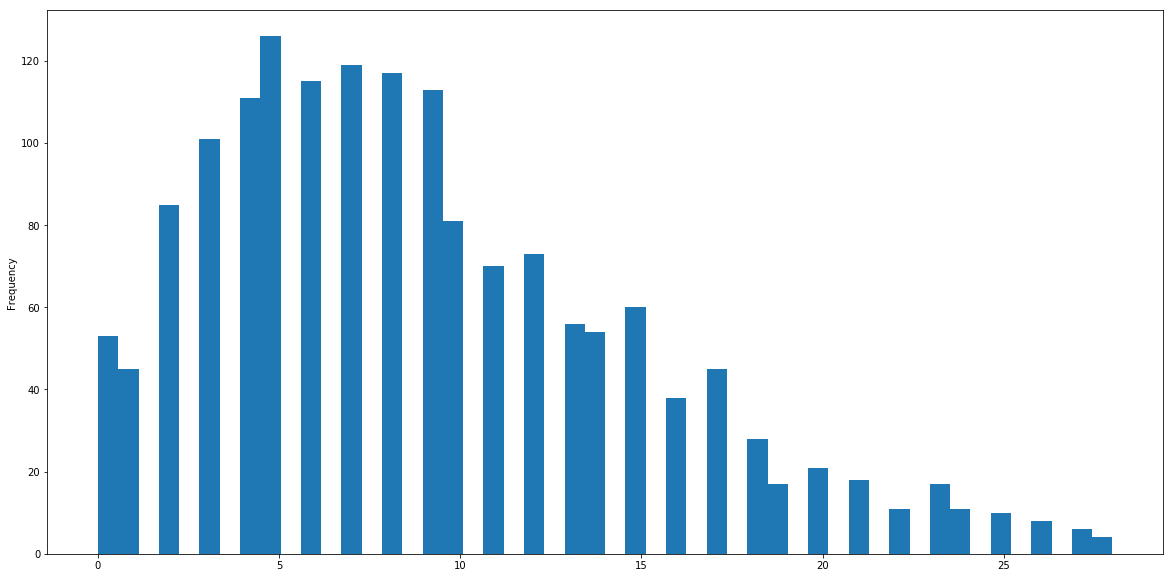

In [45]:
df[df['questionnaire_kind']=='PHQ9'][phq9_cols].sum(axis=1).plot(kind='hist', bins=50, figsize=(20,10))

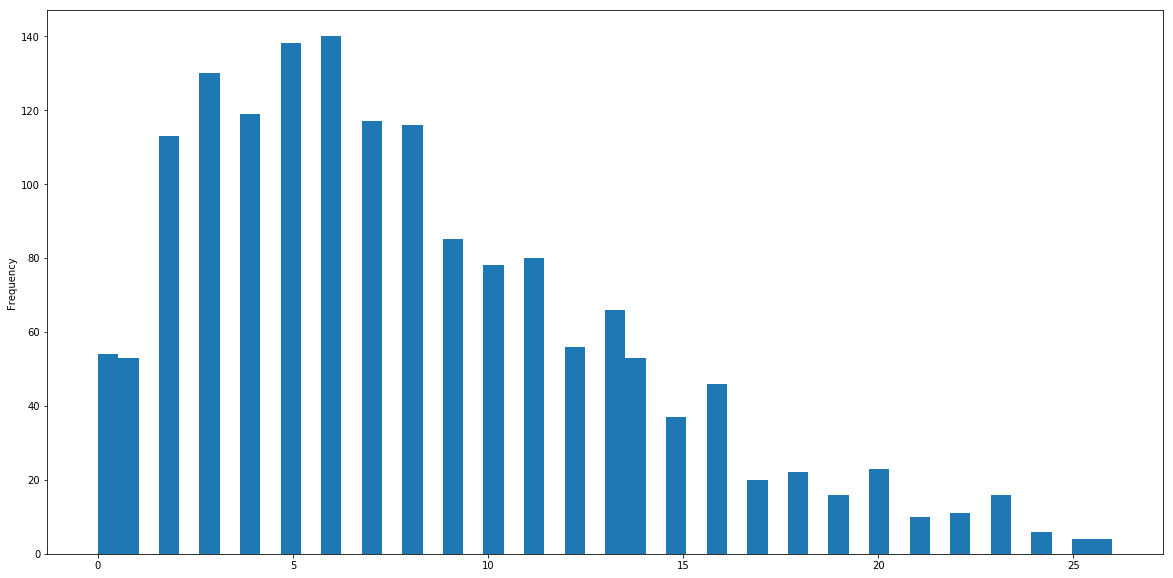

In [24]:
df['PHQ9_score'].plot(kind='hist', bins=50, figsize=(20,10))

- Q4 What is the average change in total PHQ9 score for members using the platform

In [67]:
def delta_change(row):
    delta={}
    for x in range(len(row)):
        print(row['PHQ9_score'])
#         return len(row)

In [97]:
df[['assessment_created_at', 'questionnaire_created_at']].head()

,assessment_created_at,questionnaire_created_at
1,2018-11-22 15:28:26+00:00,2018-11-22T15:30:05Z
2,2018-11-22 15:28:26+00:00,2018-11-22T15:30:05Z
3,2018-09-20 00:36:27+00:00,2018-09-20T00:36:57Z
4,2018-09-20 00:36:27+00:00,2018-09-20T00:36:57Z
5,2018-11-13 22:52:02+00:00,2018-11-13T22:53:01Z


In [94]:
df.groupby(['member_id_hashed', 'questionnaire_kind'])['PHQ9_q4', 'SDS_days_unproductive'].describe()

PHQ9_q4  \
                                                                        count   
member_id_hashed                                   questionnaire_kind           
0040127edb79766a0e8308d1ebcf836d3b5be39a15e4676... PHQ9                   1.0   
                                                   SDS                    0.0   
0057c8f10817bcb578358cb533bf34c517dbe2a9b66b1ac... PHQ9                   1.0   
                                                   SDS                    0.0   
0090bd9df84a2cd4f55f89c7bbf3a40cdbb65cd037e8e02... PHQ9                   1.0   
                                                   SDS                    0.0   
009d5573cdd71d2bf6ad49ce14aae5e2690fe3cdb914d23... PHQ9                   1.0   
                                                   SDS                    0.0   
00acaf4db371e047188a22336128bb1b29981ab0344e74d... PHQ9                   1.0   
                                                   SDS                    0.0   
00bbcdd41cbce94949d3ab1d25de9ad9856f417258ab22f... PHQ9                   1.0   
                                                   SDS                    0.0   
00ec0cec87d802094e15828260b8486cf6c9cbd4f7caac2... PHQ9                   1.0   
                                                   SDS                    0.0   
01125b067a063654a40d2038b605839a46516af1b7925e6... PHQ9                   1.0   
                                                   SDS                    0.0   
016a04aaa9790750ac37667645e515b452cbdcbc5bc9f6a... PHQ9                   1.0   
                                                   SDS                    0.0   
01eb0206882efc1aecaa5b15999d5577faafedff739e9c0... PHQ9                   4.0   
                                                   SDS                    0.0   
01fa5852439855844d4ce5a973867c4e2f336980f053afa... PHQ9                   1.0   
                                                   SDS                    0.0   
02256339a5254d195f9a74fa9c92c503db40be34d5d427e... PHQ9                   1.0   
                                                   SDS                    0.0   
023acfa5d35a1927f6b631fc832381f0174fa6875d13381... PHQ9                   1.0   
                                                   SDS                    0.0   
0248cc3d76ec946835297fbe85a41c6f031a951b3c42da0... PHQ9                   1.0   
                                                   SDS                    0.0   
026356067df6ce1156d1c6f3d806b8fab84a26f5768ca7a... PHQ9                   1.0   
                                                   SDS                    0.0   
...                                                                       ...   
fcca4ce48faf74cd97c387120eddc4594c5575921b7f5fa... SDS                    0.0   
fd014e0e5d175f2bbb53dc64adbee141b425f1d5fdff198... PHQ9                   1.0   
                                                   SDS                    0.0   
fd1d483e04f75333c6d599040e4475842db452b04c2c447... PHQ9                   2.0   
                                                   SDS                    0.0   
fd21e8d3d34df451b08c073aa49f8b61c315ad6a71c0b41... PHQ9                   1.0   
                                                   SDS                    0.0   
fd323f4887fc9827ef2685d70d47668b0f3d9a1eb725881... PHQ9                   2.0   
                                                   SDS                    0.0   
fd401c6b03b76da820a12b9c7cd0c01dbc34a612f05c74e... PHQ9                   1.0   
                                                   SDS                    0.0   
fde3b99da79ea0ca68d5c043c89351f9fa230310605056f... PHQ9                   1.0   
                                                   SDS                    0.0   
fe1585d29b0d720bbce3d6ddbbfd7c4cccd39db5459f289... PHQ9                   1.0   
                                                   SDS                    0.0   
fe249de68981b1a041e5f2d8466fe9e61bc40076cc5c8b5... PHQ9                   2.0   
                    

In [95]:
def regress(df):
    try:
        y = df['usage_value'].values
        x = df['usage_date'].values
        model = linregress(x, y)
        return model[0]

    except Exception:
        log.exception('Error running make_labels.regress() in common module')
        return 0


def regress_clients(data, time_range):  # time_range is a list of 2 datetime objects [start, stop]
    try:
        # given a time_range, subset the data that is time-relevant
        
        # change the usage_date time into integers, need to do it here bc before you lose the usage_date component of it
        df['usage_date'] = df['usage_date'].map(dt.toordinal)  # causing a settingwithcopy warning, think about it some more?
        df['usage_date'] = df['usage_date'] - df['usage_date'].min()  # so it'll be like day 1, 2, 3...
        return df.groupby('amid').apply(regress).reset_index()

    except Exception:
        log.exception('Error running make_labels.regress_clients() in common module')
        return pd.DataFrame()


def label_flat(x):
    if x > 0:
        label = 1
    elif x < 0:
        label = -1
    else:
        label = 0
    return label


def make_label(df, time_range, form):
    try:
        amid_ratio = regress_clients(df, time_range)
        if form == 'binary':
            amid_ratio['flag'] = amid_ratio[0].apply(lambda x: 1 if x < 0 else 0)
            labels = amid_ratio[['amid', 'flag']]
        elif form == 'flat':
            amid_ratio['class'] = amid_ratio[0].apply(label_flat)
            labels = amid_ratio[['amid', 'class']]
        return labels

    except Exception:
        log.exception('Error running make_labels.make_label() in common module')